<h1>Kmeans for Kmeans CF Model</h1>
the parameters in the Kmeans CF model is based on this

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kmeansTrial(fitData,totClusters):
  wcss = []
  for i in range(1, totClusters):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=150)
    k_means.fit_predict(fitData)
    wcss.append(k_means.inertia_)
  #plot elbow curve
  fig = plt.figure(figsize=(30, 10))
  plt.plot(np.arange(1, totClusters), wcss)
  plt.xticks(np.arange(1, totClusters, step=1), rotation=90)
  plt.xlabel('Clusters')
  plt.ylabel('SSE')
  plt.show()
  
def kmeansVisualize(fitData, k):
  '''
  Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
  '''
  reduced_data = PCA(n_components=2).fit_transform(fitData)
  kmeans = KMeans(init="k-means++", n_clusters=k)
  kmeans.fit(reduced_data)

  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1)
  plt.clf()
  plt.imshow(
      Z,
      interpolation="nearest",
      extent=(xx.min(), xx.max(), yy.min(), yy.max()),
      cmap=plt.cm.Paired,
      aspect="auto",
      origin="lower",
  )

  plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="x",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )
  plt.title(
      "K-means clustering on the digits dataset (PCA-reduced data)\n"
      "Centroids are marked with white cross"
  )
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())
  plt.show()
  return kmeans

Preprocessing for the user data for the kmeans model

In [7]:
# User based kmeans
import preprocessingFuncts as pp

userData = pp.readUserData()
userData = userData.drop(['user_id','age','zip_code'],axis='columns')
userData

,gender,occupation,age_category
0,1,19,2
1,0,13,5
2,1,20,2
3,1,19,2
4,0,13,3
...,...,...,...
938,0,18,2
939,1,0,3
940,1,18,1
941,0,10,4


Preprocessing for the item data for the kmeans model

In [8]:
itemData = pp.readItemData()
itemData = itemData.drop(
    ['item_id', 'title', 'year_category'], axis='columns').dropna()
itemData

,year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1995.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1995.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1995.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1995.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1995.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1998.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1998.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1998.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1994.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1>Testing out elbow method for both user and item based</h1>

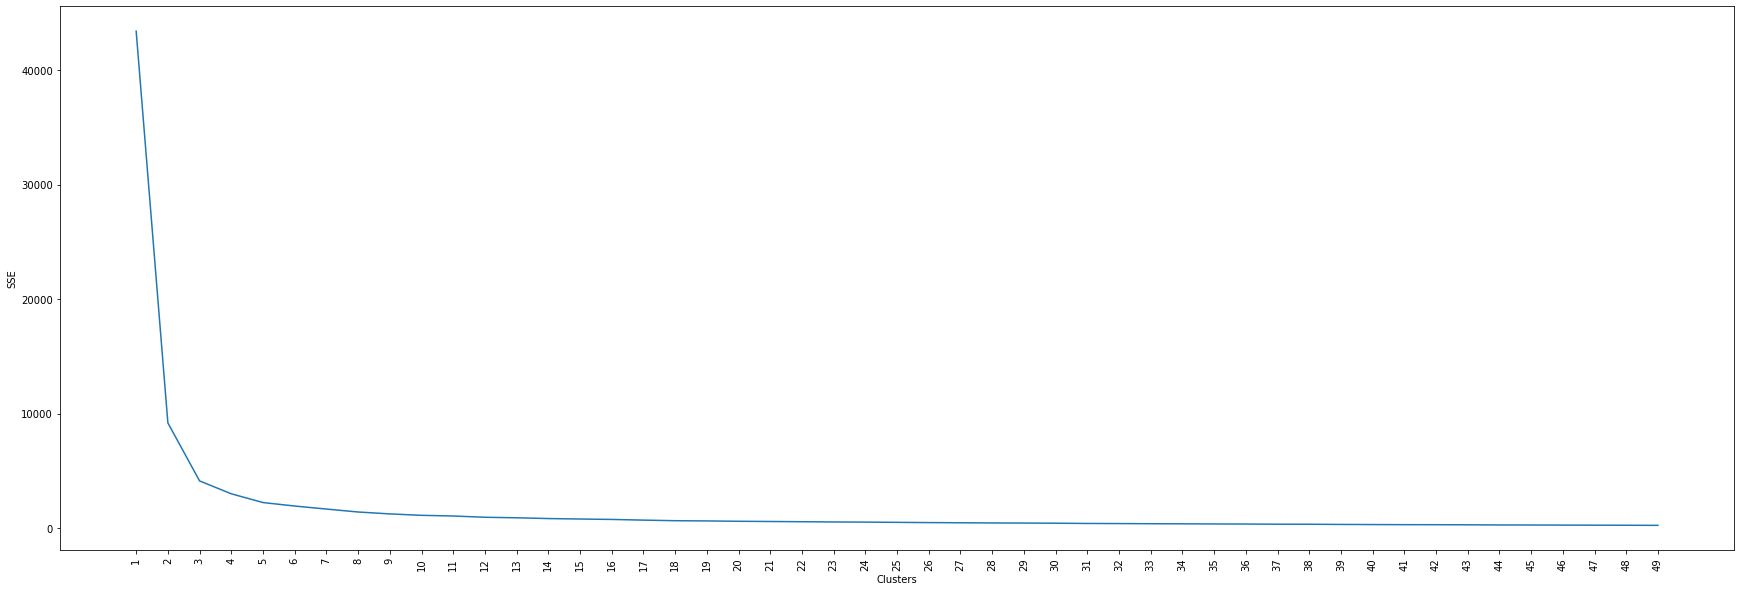

In [9]:
# testing the kmeans on user data

kmeansTrial(userData,50) #k = 5

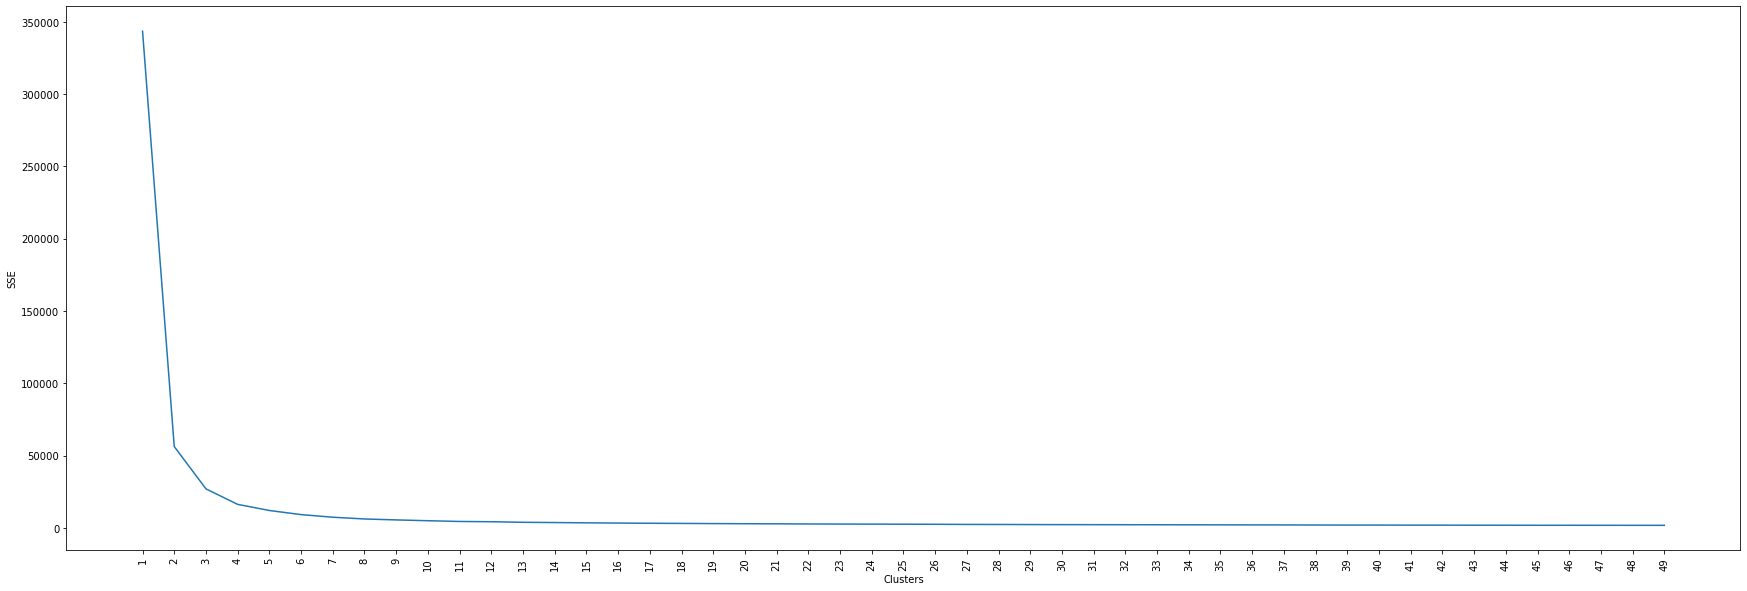

In [10]:
kmeansTrial(itemData,50) #k = 4

<h1>Visualising the clusters for both item and user based kmeans</h1>

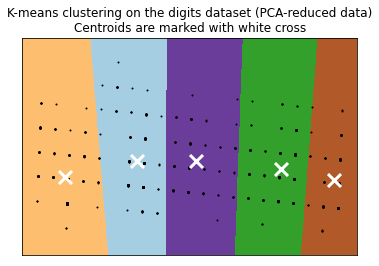

KMeans(n_clusters=5)

In [11]:
userKmeans = KMeans(n_clusters=5, init='k-means++', random_state=150)
userKmeans.fit(userData)
kmeansVisualize(userData,5)

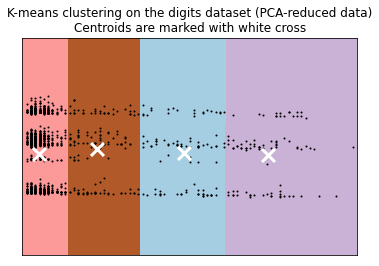

KMeans(n_clusters=4)

In [12]:
itemKmeans = KMeans(n_clusters=4, init='k-means++', random_state=150)
itemKmeans.fit(itemData)
kmeansVisualize(itemData,4)

<h1>Creating test data to test the Kmeans</h1>

In [13]:
# Getting the test items to be predicted

testData = pp.readRatingData('ml-100k\\ua.test')
testData

,user_id,item_id,rating
0,1,20,4
1,1,33,4
2,1,61,4
3,1,117,3
4,1,155,2
...,...,...,...
9425,943,232,4
9426,943,356,4
9427,943,570,1
9428,943,808,4


In [14]:
#specify

userTestData = pp.specifyByUserData(pp.readUserData(),testData,['gender','occupation','age_category'])
userTestX, userTestY = userTestData.drop('rating',axis='columns'),userTestData['rating']
userTestData

,user_id,item_id,rating,gender,occupation,age_category
0,1,20,4,1,19,2
1,1,33,4,1,19,2
2,1,61,4,1,19,2
3,1,117,3,1,19,2
4,1,155,2,1,19,2
...,...,...,...,...,...,...
9425,943,232,4,1,18,2
9426,943,356,4,1,18,2
9427,943,570,1,1,18,2
9428,943,808,4,1,18,2


In [15]:
itemTestData = pp.specifyByItemData(pp.readItemData(), testData, 'all').drop('year_category',axis='columns')
itemTestX, itemTestY = itemTestData.drop('rating', axis='columns'), itemTestData['rating']
itemTestData


,user_id,item_id,rating,year,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,20,4,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63,20,3,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,115,20,3,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,189,20,5,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,296,20,5,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,934,1425,1,1994.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9426,936,818,4,1996.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9427,936,1258,2,1997.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9428,943,570,1,1994.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<h1>Adding cluster labels to the data</h1>

In [16]:
# testing the kmeans for one data only
# user
userDataClustered = userData.copy()
userDataClustered['cluster'] = userKmeans.labels_
print("All users' data with their cluster classification")
display(userDataClustered)

clusterArrU = []

for i in range(0,5):
  print(f"cluster {i}")
  clusterArrU.append(userDataClustered.groupby(['cluster']).get_group(i))
  display(clusterArrU[-1])
  print('\n\n')



All users' data with their cluster classification


,gender,occupation,age_category,cluster
0,1,19,2,2
1,0,13,5,1
2,1,20,2,2
3,1,19,2,2
4,0,13,3,1
...,...,...,...,...
938,0,18,2,2
939,1,0,3,0
940,1,18,1,2
941,0,10,4,4


cluster 0


,gender,occupation,age_category,cluster
6,1,0,5,0
7,1,0,3,0
22,0,1,2,0
23,0,1,2,0
30,1,1,2,0
...,...,...,...,...
901,0,1,4,0
919,0,1,2,0
921,0,0,2,0
934,1,2,4,0





cluster 1


,gender,occupation,age_category,cluster
1,0,13,5,1
4,0,13,3,1
10,0,13,3,1
11,0,13,2,1
16,1,14,2,1
...,...,...,...,...
913,0,13,4,1
918,1,13,2,1
923,1,13,2,1
926,1,14,2,1





cluster 2


,gender,occupation,age_category,cluster
0,1,19,2,2
2,1,20,2,2
3,1,19,2,2
8,1,18,2,2
13,1,17,4,2
...,...,...,...,...
932,1,18,2,2
937,0,19,3,2
938,0,18,2,2
940,1,18,1,2





cluster 3


,gender,occupation,age_category,cluster
5,1,6,4,3
12,1,3,4,3
14,0,3,4,3
15,1,5,2,3
24,1,4,3,3
...,...,...,...,...
925,1,5,4,3
930,1,3,5,3
931,1,3,5,3
933,1,4,6,3





cluster 4


,gender,occupation,age_category,cluster
9,1,9,5,4
18,1,10,3,4
19,0,8,4,4
26,0,10,3,4
34,0,8,1,4
...,...,...,...,...
897,1,8,2,4
905,1,10,4,4
907,0,10,4,4
909,1,7,2,4


<h1>Finding the distances of the training data from their clusters</h1>

In [17]:
testU = userTestX.loc[0].to_frame().transpose().drop(['user_id','item_id'],axis='columns')
display(testU)
print('below is the distance of testU to each cluster')
print(userKmeans.transform(testU))

,gender,occupation,age_category
0,1,19,2


below is the distance of testU to each cluster
[[18.68489087  5.62414786  0.83170767 15.12967015  9.53111931]]


In [18]:
#Get distance from clusters for each data. lets try just user for now

itemKmeans = KMeans(n_clusters=4, init='k-means++', random_state=150)
itemsTransform = itemKmeans.fit_transform(itemData)
itemsTransform


array([[ 1.62440708, 53.19381906, 33.61483151, 13.54006198],
       [ 1.62756561, 53.19723698, 33.61984146, 13.53623193],
       [ 1.05273492, 53.18035886, 33.59478425, 13.48908821],
       ...,
       [ 3.02405929, 56.18144813, 36.59708146, 16.48747956],
       [ 1.47305111, 52.17902422, 32.59074865, 12.47604893],
       [ 1.07855296, 54.17640064, 34.58732735, 14.4675864 ]])

In [22]:
itemsTransformDF = pd.DataFrame(data=itemsTransform,columns=range(1,5))
itemsTransformDF['item_id'] = pp.readItemData().dropna()['item_id']
itemsTransformDF=itemsTransformDF.set_index('item_id')
itemsTransformDF
# len(pp.readItemData()['item_id'].values.tolist())


,1,2,3,4
item_id,,,,
1.0,1.624407,53.193819,33.614832,13.540062
2.0,1.627566,53.197237,33.619841,13.536232
3.0,1.052735,53.180359,33.594784,13.489088
4.0,1.263096,53.191042,33.607315,13.505004
5.0,1.440568,53.191683,33.612013,13.532948
...,...,...,...,...
1677.0,2.904893,56.176189,36.586869,16.464776
1678.0,3.118890,56.185089,36.603696,16.503646
1679.0,3.024059,56.181448,36.597081,16.487480


<h1>Finding similarity based on cluster distances</h1>

,0,1,2,3,4,5,6,7,8,9,...,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680
0,1.000000,0.999915,0.993777,0.996066,0.998006,0.990220,0.995284,0.996844,0.990220,0.981568,...,0.996889,0.388229,0.981019,0.981019,0.981019,0.942754,0.941762,0.942198,0.980519,0.981019
1,0.999915,1.000000,0.993743,0.996034,0.997971,0.990187,0.995251,0.996810,0.990187,0.981594,...,0.996857,0.388191,0.981037,0.981037,0.981037,0.942791,0.941799,0.942235,0.980488,0.981037
2,0.993777,0.993743,1.000000,0.997708,0.995766,0.996442,0.998491,0.996932,0.996442,0.980658,...,0.996886,0.384896,0.981439,0.981439,0.981439,0.940451,0.939255,0.939781,0.980579,0.981439
3,0.996066,0.996034,0.997708,1.000000,0.998053,0.994152,0.999213,0.999218,0.994152,0.981276,...,0.999176,0.386056,0.981576,0.981576,0.981576,0.941413,0.940288,0.940783,0.980740,0.981576
4,0.998006,0.997971,0.995766,0.998053,1.000000,0.992212,0.997270,0.998832,0.992212,0.981591,...,0.998871,0.387136,0.981470,0.981470,0.981470,0.942167,0.941105,0.941572,0.980661,0.981470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0.942754,0.942791,0.940451,0.941413,0.942167,0.938985,0.941043,0.941682,0.938985,0.959587,...,0.941683,0.359841,0.957594,0.957594,0.957594,1.000000,0.997635,0.998680,0.923466,0.957594
1677,0.941762,0.941799,0.939255,0.940288,0.941105,0.937684,0.939894,0.940583,0.937684,0.958263,...,0.940585,0.360879,0.956115,0.956115,0.956115,0.997635,1.000000,0.998955,0.922569,0.956115
1678,0.942198,0.942235,0.939781,0.940783,0.941572,0.938256,0.940399,0.941066,0.938256,0.958849,...,0.941068,0.360413,0.956768,0.956768,0.956768,0.998680,0.998955,1.000000,0.922961,0.956768
1679,0.980519,0.980488,0.980579,0.980740,0.980661,0.979632,0.980770,0.980773,0.979632,0.962259,...,0.980793,0.398703,0.962318,0.962318,0.962318,0.923466,0.922569,0.922961,1.000000,0.962318


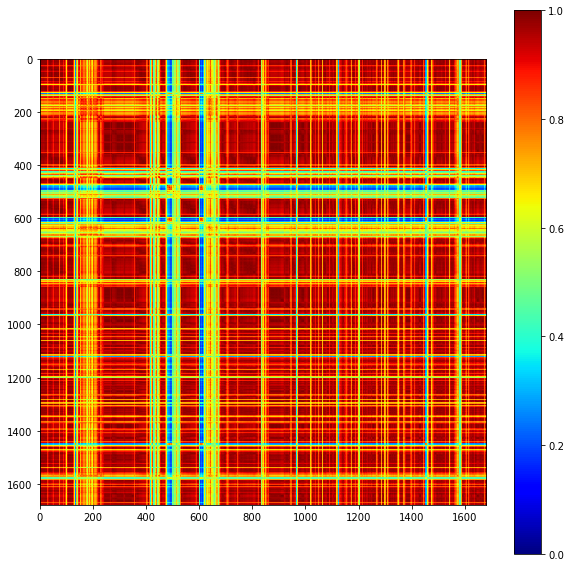

In [20]:
#now the whole thing for user
import sklearn.metrics as metrics

distance = metrics.pairwise_distances(itemsTransformDF.to_numpy(),metric='euclidean')
MAX = np.amax(distance)
distance = (MAX - distance)/MAX
display(pd.DataFrame(distance))
# distance = pd.DataFrame(distance)
plt.figure(figsize=(10, 10))
plt.imshow(distance)
plt.set_cmap('jet')  # Set the color of the box
plt.colorbar()  # Show the right side color
plt.show()


,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,1.000000,0.589447,0.923397,1.000000,0.572719,0.219641,0.036560,0.008394,0.929477,0.370386,...,0.168633,0.062546,0.583214,0.089355,0.979812,0.932703,0.008394,0.942929,0.402814,0.929477
2,0.589447,1.000000,0.539370,0.589447,0.948186,0.548791,0.254173,0.234133,0.640046,0.741369,...,0.450010,0.325463,0.955246,0.370501,0.600789,0.646377,0.234133,0.643907,0.792214,0.640046
3,0.923397,0.539370,1.000000,0.923397,0.517971,0.187985,0.030641,0.000000,0.853791,0.330212,...,0.148121,0.045722,0.528433,0.068282,0.926463,0.859217,0.000000,0.873204,0.357599,0.853791
4,1.000000,0.589447,0.923397,1.000000,0.572719,0.219641,0.036560,0.008394,0.929477,0.370386,...,0.168633,0.062546,0.583214,0.089355,0.979812,0.932703,0.008394,0.942929,0.402814,0.929477
5,0.572719,0.948186,0.517971,0.572719,1.000000,0.522617,0.216454,0.198277,0.628157,0.718455,...,0.416847,0.292803,0.986974,0.339821,0.582790,0.633169,0.198277,0.628527,0.777145,0.628157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.932703,0.646377,0.859217,0.932703,0.633169,0.261992,0.057263,0.030955,0.986208,0.420071,...,0.201730,0.092259,0.643572,0.122626,0.932331,1.000000,0.030955,0.981770,0.456484,0.986208
940,0.008394,0.234133,0.000000,0.008394,0.198277,0.598085,0.949652,1.000000,0.022153,0.422683,...,0.744031,0.858074,0.201719,0.784179,0.020964,0.030955,1.000000,0.039017,0.347511,0.022153
941,0.942929,0.643907,0.873204,0.942929,0.628527,0.264774,0.065942,0.039017,0.969619,0.420501,...,0.207365,0.098553,0.639065,0.127952,0.946399,0.981770,0.039017,1.000000,0.455159,0.969619
942,0.402814,0.792214,0.357599,0.402814,0.777145,0.711738,0.361686,0.347511,0.450227,0.921425,...,0.584450,0.457100,0.774124,0.511446,0.414166,0.456484,0.347511,0.455159,1.000000,0.450227


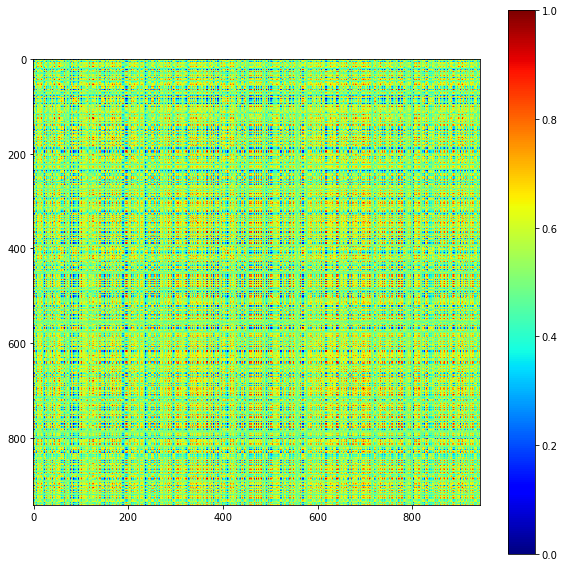

In [26]:
import sklearn.metrics as metrics

userKmeans = KMeans(n_clusters=5, init='k-means++', random_state=150)
usersTransform = userKmeans.fit_transform(userData)
usersTransformDF = pd.DataFrame(data=usersTransform, columns=range(1, 6))
usersTransformDF['user_id'] = pp.readUserData()['user_id']
usersTransformDF = usersTransformDF.set_index('user_id')

distance = metrics.pairwise_distances(usersTransformDF.to_numpy())
MAX = np.amax(distance)
distance = (MAX - distance)/MAX
sim = pd.DataFrame(distance)
sim.columns = pp.readUserData()['user_id'].values
sim.index = pp.readUserData()['user_id'].values
display(sim)

plt.figure(figsize=(10, 10))
plt.imshow(distance)
plt.set_cmap('jet')  # Set the color of the box
plt.colorbar()  # Show the right side color
plt.show()
